In [1]:
# User Inputs
dir_name = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Formsforinput\fresh'
in_form = 'image_processing1.jpg'
template_img = 'marker_template_to_be_identified.png'

In [8]:
# import sys
teamplate_path = template_img  # 'passporttemplate.png'
image_to_be_processed = in_form # 'resized.png'
# output_image = sys.argv[3] # 'Markeronresized.png'


import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
# Load input image and convert to grayscale
image = cv2.imread(os.path.join(dir_name,image_to_be_processed))
#image = cv2.imread('form1.png')
#cv2.imshow('Where is Waldo?', image)
#cv2.waitKey(0)
#methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Load Template image
#template = cv2.imread('images/tent.jpg',0)
template = cv2.imread(os.path.join(dir_name, teamplate_path),0)
#template = cv2.imread('cms_1500_cut_medicare.png',0)
#template = cv2.imread('collegeform_logo.png',0)

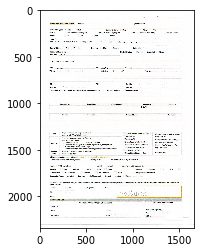

(<matplotlib.image.AxesImage at 0xa7d04e0>, None)

In [18]:
plt.imshow(image), plt.show()

In [19]:
gray = cv2.bitwise_not(gray)
coords = np.column_stack(np.where(gray > 0))
angle = cv2.minAreaRect(coords)[-1]
print angle

-90.0


In [20]:
# the `cv2.minAreaRect` function returns values in the range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make it positive
else:
    angle = -angle

# rotate the image to deskew it
(h, w) = gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(gray, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

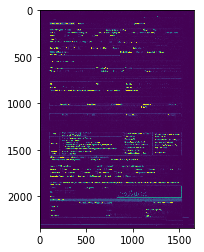

(<matplotlib.image.AxesImage at 0xa840320>, None)

In [21]:
plt.imshow(rotated), plt.show()

In [13]:
scales = np.arange(0.5, 2.0, 0.1)

mx_f = 0.0
mxLoc_f = (0,0)
for i in scales:
    for j in scales:
        large_image = cv2.resize(rotated,None,fx=i, fy=i, interpolation = cv2.INTER_CUBIC)
        small_image = cv2.resize(template,None,fx=j, fy=j, interpolation = cv2.INTER_CUBIC)

        result = cv2.matchTemplate(small_image, large_image, cv2.TM_CCOEFF_NORMED)
        _,mx,_,mxLoc = cv2.minMaxLoc(result)
        if (mx > mx_f):
            mx_f = mx
            mxLoc_f = mxLoc
            print mx, mxLoc, i, j

0.361556619406 (297, 642) 0.5 0.5
0.380983173847 (365, 772) 0.6 0.5
0.385193526745 (436, 903) 0.7 0.5
0.391410470009 (479, 1033) 0.8 0.5
0.401832550764 (425, 1482) 0.9 0.5
0.410274773836 (106, 1294) 1.0 0.5
0.451101154089 (200, 1815) 1.1 0.5
0.485085755587 (215, 1981) 1.2 0.5
0.525622963905 (1220, 2612) 1.3 0.5
0.554973840714 (1569, 2813) 1.4 0.5
0.564400494099 (1397, 3015) 1.5 0.5
0.569649457932 (1509, 3618) 1.8 0.6


In [32]:
result = cv2.matchTemplate(rotated, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = min_loc
print("Match ratio: " + str(min_val))
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0]) # Changed by Ankur Arora
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

cv2.imwrite('output_image1.png', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Match ratio: -0.999977350235


True

In [30]:
cv2.matchTemplate?